In [1]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext lab_black

In [2]:
dar_path_dict_dict = {
    y: {
        z.split("/")[-1].split("__")[-2]: z
        for z in sorted(glob.glob("downstream_analysis/DARs/" + y + "/*__DARs.bed"))
    }
    for y in [x.split("/")[-1] for x in sorted(glob.glob("downstream_analysis/DARs/*"))]
}
dar_path_dict_dict

{'master_sub_1.FIXEDCELLS': {'B_cell': 'downstream_analysis/DARs/master_sub_1.FIXEDCELLS/master_sub_1.FIXEDCELLS__B_cell__DARs.bed',
  'CD14+_monocyte': 'downstream_analysis/DARs/master_sub_1.FIXEDCELLS/master_sub_1.FIXEDCELLS__CD14+_monocyte__DARs.bed',
  'CD16+_monocyte': 'downstream_analysis/DARs/master_sub_1.FIXEDCELLS/master_sub_1.FIXEDCELLS__CD16+_monocyte__DARs.bed',
  'CD4+_T_cell': 'downstream_analysis/DARs/master_sub_1.FIXEDCELLS/master_sub_1.FIXEDCELLS__CD4+_T_cell__DARs.bed',
  'Cytotoxic_T_cell': 'downstream_analysis/DARs/master_sub_1.FIXEDCELLS/master_sub_1.FIXEDCELLS__Cytotoxic_T_cell__DARs.bed',
  'Dendritic_cell': 'downstream_analysis/DARs/master_sub_1.FIXEDCELLS/master_sub_1.FIXEDCELLS__Dendritic_cell__DARs.bed',
  'Natural_killer_cell': 'downstream_analysis/DARs/master_sub_1.FIXEDCELLS/master_sub_1.FIXEDCELLS__Natural_killer_cell__DARs.bed'}}

In [3]:
df_merged = pd.DataFrame()
for sample, dar_path_dict in dar_path_dict_dict.items():
    print(sample)
    for cell_type, dar_path in dar_path_dict.items():
        print(cell_type)
        df = pd.read_csv(dar_path, sep="\t", header=None)
        df["sample"] = sample
        df_merged = pd.concat([df_merged, df.iloc[:1000]])

master_sub_1.FIXEDCELLS
B_cell
CD14+_monocyte
CD16+_monocyte
CD4+_T_cell
Cytotoxic_T_cell
Dendritic_cell
Natural_killer_cell


In [4]:
df_merged.columns = [
    "chrom",
    "start",
    "end",
    "cell_type",
    "logfc",
    "strand",
    "p_val",
    "sample",
]

In [5]:
df_merged["tech"] = [x.split("_")[1] for x in df_merged["sample"]]

In [6]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

tech_order = [
    "10xv1",
    "10xv11",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "ddseq",
    "s3atac",
    "hydrop",
]

tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "s3atac": "s3-ATAC",
}

cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "CD4+ T cells",
    "Cytotoxic_T_cell": "CD8+ T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "NK cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

cell_type_order = [
    "B_cell",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Natural_killer_cell",
    "CD14+_monocyte",
    "CD16+_monocyte",
    "Dendritic_cell",
]

sex_dict = {"Male": "Female", "Female": "Male"}

In [7]:
df_merged

,chrom,start,end,cell_type,logfc,strand,p_val,sample,tech
0,chr5,158898392,158898892,B_cell,5.782083,.,0.0,master_sub_1.FIXEDCELLS,sub
1,chr9,123608101,123608601,B_cell,5.775135,.,0.0,master_sub_1.FIXEDCELLS,sub
2,chr7,139708452,139708952,B_cell,5.775135,.,0.0,master_sub_1.FIXEDCELLS,sub
3,chr10,56634070,56634570,B_cell,5.765780,.,0.0,master_sub_1.FIXEDCELLS,sub
4,chr9,117936142,117936642,B_cell,5.765780,.,0.0,master_sub_1.FIXEDCELLS,sub
...,...,...,...,...,...,...,...,...,...
995,chr20,51667003,51667503,Natural_killer_cell,2.819845,.,0.0,master_sub_1.FIXEDCELLS,sub
996,chr5,76737061,76737561,Natural_killer_cell,2.818776,.,0.0,master_sub_1.FIXEDCELLS,sub
997,chr19,47539827,47540327,Natural_killer_cell,2.817912,.,0.0,master_sub_1.FIXEDCELLS,sub
998,chr6,11202896,11203396,Natural_killer_cell,2.817323,.,0.0,master_sub_1.FIXEDCELLS,sub


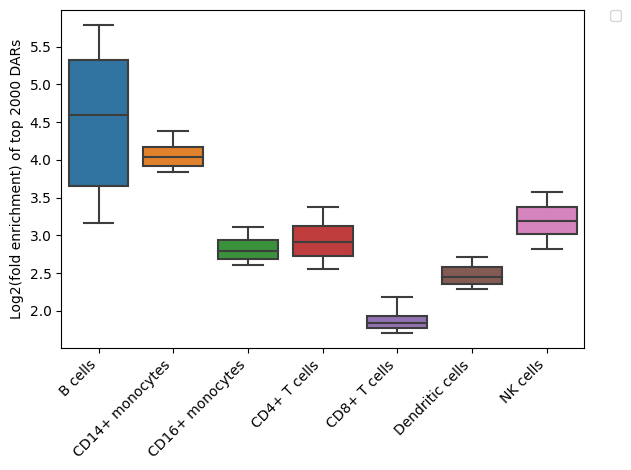

In [8]:
fig, ax = plt.subplots()
sns.boxplot(
    df_merged,
    x="cell_type",
    y="logfc",
    # hue="tech",
    # order=cell_type_order,
    # hue_order=tech_order,
    # palette=tech_color_palette,
    ax=ax,
    fliersize=0,
    showfliers=False,
)
plt.xticks(rotation=45, ha="right")

plt.ylabel("Log2(fold enrichment) of top 2000 DARs")
plt.xlabel("")
labels = [item.get_text() for item in ax.get_xticklabels()]
labels_alias = [cell_type_alias_dict[x] for x in labels]
ax.set_xticklabels(labels_alias)


handles, labels = ax.get_legend_handles_labels()
l = plt.legend(
    handles[0 : len(tech_order)],
    [tech_alias_dict[x] for x in labels[0 : len(tech_order)]],
    bbox_to_anchor=(1.05, 1),
    loc=2,
    borderaxespad=0.0,
)
plt.tight_layout()
plt.savefig(
    "plts_final/FIXEDCELLS__top1k_DARs_logfc.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/FIXEDCELLS__top1k_DARs_logfc.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)

# male female DARs

In [9]:
dar_path_dict_dict = {
    y: {
        z.split("/")[-1].split("__")[-2]: z
        for z in sorted(glob.glob("male_female_DARs/" + y + "/*_DARs.bed"))
    }
    for y in [x.split("/")[-1] for x in sorted(glob.glob("male_female_DARs/*"))]
}
dar_path_dict_dict

{'master_sub_1.FIXEDCELLS': {'sampleA_B_cell_VS_sampleB_B_cell': 'male_female_DARs/master_sub_1.FIXEDCELLS/master_sub_1.FIXEDCELLS__sampleA_B_cell_VS_sampleB_B_cell__1-2xfoldchange_DARs.bed',
  'sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte': 'male_female_DARs/master_sub_1.FIXEDCELLS/master_sub_1.FIXEDCELLS__sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte__1-2xfoldchange_DARs.bed',
  'sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte': 'male_female_DARs/master_sub_1.FIXEDCELLS/master_sub_1.FIXEDCELLS__sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte__1-2xfoldchange_DARs.bed',
  'sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell': 'male_female_DARs/master_sub_1.FIXEDCELLS/master_sub_1.FIXEDCELLS__sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell__1-2xfoldchange_DARs.bed',
  'sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell': 'male_female_DARs/master_sub_1.FIXEDCELLS/master_sub_1.FIXEDCELLS__sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell__1-2xfoldchange_DARs.bed',
  'sampleA_Natural_kille

In [10]:
dar_path_dict_dict

{'master_sub_1.FIXEDCELLS': {'sampleA_B_cell_VS_sampleB_B_cell': 'male_female_DARs/master_sub_1.FIXEDCELLS/master_sub_1.FIXEDCELLS__sampleA_B_cell_VS_sampleB_B_cell__1-2xfoldchange_DARs.bed',
  'sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte': 'male_female_DARs/master_sub_1.FIXEDCELLS/master_sub_1.FIXEDCELLS__sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte__1-2xfoldchange_DARs.bed',
  'sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte': 'male_female_DARs/master_sub_1.FIXEDCELLS/master_sub_1.FIXEDCELLS__sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte__1-2xfoldchange_DARs.bed',
  'sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell': 'male_female_DARs/master_sub_1.FIXEDCELLS/master_sub_1.FIXEDCELLS__sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell__1-2xfoldchange_DARs.bed',
  'sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell': 'male_female_DARs/master_sub_1.FIXEDCELLS/master_sub_1.FIXEDCELLS__sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell__1-2xfoldchange_DARs.bed',
  'sampleA_Natural_kille

In [11]:
df_merged = pd.DataFrame()
for sample, dar_path_dict in dar_path_dict_dict.items():
    print(sample)
    for cell_type, dar_path in dar_path_dict.items():
        print(cell_type)
        df = pd.read_csv(dar_path, sep="\t", header=None)
        df["sample"] = sample
        df_merged = pd.concat([df_merged, df.iloc[:1000]])

master_sub_1.FIXEDCELLS
sampleA_B_cell_VS_sampleB_B_cell
sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte
sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte
sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell
sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell
sampleA_Natural_killer_cell_VS_sampleB_Natural_killer_cell
sampleB_B_cell_VS_sampleA_B_cell
sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte
sampleB_CD16+_monocyte_VS_sampleA_CD16+_monocyte
sampleB_CD4+_T_cell_VS_sampleA_CD4+_T_cell
sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell
sampleB_Natural_killer_cell_VS_sampleA_Natural_killer_cell


In [12]:
df_merged.columns = [
    "chrom",
    "start",
    "end",
    "cell_type",
    "logfc",
    "strand",
    "p_val",
    "sample",
]

In [13]:
df_merged["tech"] = [x.split("_")[1] for x in df_merged["sample"]]

In [14]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

tech_order = [
    "10xv1",
    "10xv11",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "ddseq",
    "s3atac",
    "hydrop",
]

tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "s3atac": "s3-ATAC",
}

cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "CD4+ T cells",
    "Cytotoxic_T_cell": "CD8+ T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "NK cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

cell_type_order = [
    "B_cell",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Natural_killer_cell",
    "CD14+_monocyte",
    "CD16+_monocyte",
    "Dendritic_cell",
]

In [15]:
df_merged

,chrom,start,end,cell_type,logfc,strand,p_val,sample,tech
0,chr2,100218504,100219004,sampleA_B_cell_VS_sampleB_B_cell,0.512158,.,0.001932,master_sub_1.FIXEDCELLS,sub
1,chr9,114696813,114697313,sampleA_B_cell_VS_sampleB_B_cell,0.512134,.,0.004781,master_sub_1.FIXEDCELLS,sub
2,chr9,75010514,75011014,sampleA_B_cell_VS_sampleB_B_cell,0.511159,.,0.018679,master_sub_1.FIXEDCELLS,sub
3,chr6,45584034,45584534,sampleA_B_cell_VS_sampleB_B_cell,0.506424,.,0.003337,master_sub_1.FIXEDCELLS,sub
4,chr8,47644134,47644634,sampleA_B_cell_VS_sampleB_B_cell,0.503652,.,0.014511,master_sub_1.FIXEDCELLS,sub
...,...,...,...,...,...,...,...,...,...
172,chr1,226635304,226635804,sampleB_Natural_killer_cell_VS_sampleA_Natural...,0.265000,.,0.001956,master_sub_1.FIXEDCELLS,sub
173,chr7,50207603,50208103,sampleB_Natural_killer_cell_VS_sampleA_Natural...,0.263992,.,0.024760,master_sub_1.FIXEDCELLS,sub
174,chr16,85447329,85447829,sampleB_Natural_killer_cell_VS_sampleA_Natural...,0.263781,.,0.022244,master_sub_1.FIXEDCELLS,sub
175,chr19,45999680,46000180,sampleB_Natural_killer_cell_VS_sampleA_Natural...,0.263685,.,0.015223,master_sub_1.FIXEDCELLS,sub


In [16]:
cell_type_alias_dict

{'B_cell': 'B cells',
 'CD14+_monocyte': 'CD14+ monocytes',
 'CD4+_T_cell': 'CD4+ T cells',
 'Cytotoxic_T_cell': 'CD8+ T cells',
 'Dendritic_cell': 'Dendritic cells',
 'Natural_killer_cell': 'NK cells',
 'CD16+_monocyte': 'CD16+ monocytes'}

In [17]:
cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "CD4+ T cells",
    "Cytotoxic_T_cell": "CD8+ T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "NK cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

cell_type_order = [
    "B_cell",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Natural_killer_cell",
    "CD14+_monocyte",
    "CD16+_monocyte",
    "Dendritic_cell",
]

In [18]:
df_merged["cell_type_specific"] = [
    cell_type_alias_dict[
        x.replace("sampleA_", "").replace("sampleB_", "").split("_VS_")[0]
    ]
    for x in df_merged["cell_type"]
]

In [19]:
cell_type_alias_dict

{'B_cell': 'B cells',
 'CD14+_monocyte': 'CD14+ monocytes',
 'CD4+_T_cell': 'CD4+ T cells',
 'Cytotoxic_T_cell': 'CD8+ T cells',
 'Dendritic_cell': 'Dendritic cells',
 'Natural_killer_cell': 'NK cells',
 'CD16+_monocyte': 'CD16+ monocytes'}

In [20]:
df_merged = df_merged.sort_values(["cell_type_specific", "cell_type"])

In [21]:
df_merged["sex"] = [
    x.split("_")[0]
    .replace("_", " ")
    .replace("sampleA", "Male")
    .replace("sampleB", "Female")
    for x in df_merged["cell_type"]
]

In [22]:
# cell_type_alias_dict = {
#     x: x.split("_VS_")[0]
#     .replace("_", " ")
#     .replace("sampleA", "Male")
#     .replace("sampleB", "Female")
#     + "s"
#     for x in labels
# }

In [23]:
# cell_type_alias_dict = {
#     "sampleA_B_cell_VS_sampleB_B_cell": "Male B cells",
#     "sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte": "Male CD14+ monocytes",
#     "sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte": "Male CD16+ monocytes",
#     "sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell": "Male CD4+ T cells",
#     "sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell": "Male Cytotoxic T cells",
#     "sampleA_Natural_killer_cell_VS_sampleB_Natural_killer_cell": "Male Natural killer cells",
#     "sampleB_B_cell_VS_sampleA_B_cell": "Female B cells",
#     "sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte": "Female CD14+ monocytes",
#     "sampleB_CD16+_monocyte_VS_sampleA_CD16+_monocyte": "Female CD16+ monocytes",
#     "sampleB_CD4+_T_cell_VS_sampleA_CD4+_T_cell": "Female CD4+ T cells",
#     "sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell": "Female Cytotoxic T cells",
#     "sampleB_Natural_killer_cell_VS_sampleA_Natural_killer_cell": "Female Natural killer cells",
# }

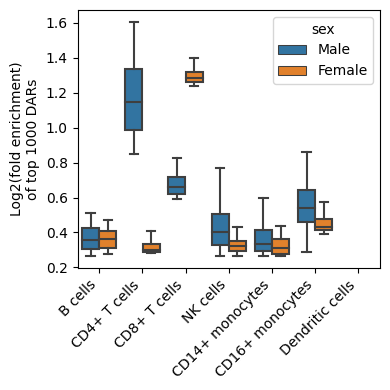

In [24]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(
    df_merged,
    x="cell_type_specific",
    y="logfc",
    hue="sex",
    # order=cell_type_order,
    order=[cell_type_alias_dict[x] for x in cell_type_order],
    # palette=tech_color_palette,
    ax=ax,
    fliersize=0,
    showfliers=False,
)
plt.xticks(rotation=45, ha="right")

plt.ylabel("Log2(fold enrichment)\nof top 1000 DARs")
plt.xlabel("")
# labels = [item.get_text() for item in ax.get_xticklabels()]
# labels_alias = [cell_type_alias_dict[x] for x in labels]
# x.set_xticklabels(labels_alias)


# handles, labels = ax.get_legend_handles_labels()
# l = plt.legend(
#     handles[0 : len(tech_order)],
#     [tech_alias_dict[x] for x in labels[0 : len(tech_order)]],
#     bbox_to_anchor=(1.05, 1),
#     loc=2,
#     borderaxespad=0.0,
# )
plt.tight_layout()
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_top1k_DARs_logfc.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_top1k_DARs_logfc.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)

# calculate accessibility in these DARs

In [25]:
import pickle

cto_path = "cistopic_objects/master_sub_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_20topics.dimreduc.consensus_harmony.pkl"
with open(cto_path, "rb") as f:
    cto = pickle.load(f)

In [26]:
df_merged

,chrom,start,end,cell_type,logfc,strand,p_val,sample,tech,cell_type_specific,sex
0,chr2,100218504,100219004,sampleA_B_cell_VS_sampleB_B_cell,0.512158,.,0.001932,master_sub_1.FIXEDCELLS,sub,B cells,Male
1,chr9,114696813,114697313,sampleA_B_cell_VS_sampleB_B_cell,0.512134,.,0.004781,master_sub_1.FIXEDCELLS,sub,B cells,Male
2,chr9,75010514,75011014,sampleA_B_cell_VS_sampleB_B_cell,0.511159,.,0.018679,master_sub_1.FIXEDCELLS,sub,B cells,Male
3,chr6,45584034,45584534,sampleA_B_cell_VS_sampleB_B_cell,0.506424,.,0.003337,master_sub_1.FIXEDCELLS,sub,B cells,Male
4,chr8,47644134,47644634,sampleA_B_cell_VS_sampleB_B_cell,0.503652,.,0.014511,master_sub_1.FIXEDCELLS,sub,B cells,Male
...,...,...,...,...,...,...,...,...,...,...,...
172,chr1,226635304,226635804,sampleB_Natural_killer_cell_VS_sampleA_Natural...,0.265000,.,0.001956,master_sub_1.FIXEDCELLS,sub,NK cells,Female
173,chr7,50207603,50208103,sampleB_Natural_killer_cell_VS_sampleA_Natural...,0.263992,.,0.024760,master_sub_1.FIXEDCELLS,sub,NK cells,Female
174,chr16,85447329,85447829,sampleB_Natural_killer_cell_VS_sampleA_Natural...,0.263781,.,0.022244,master_sub_1.FIXEDCELLS,sub,NK cells,Female
175,chr19,45999680,46000180,sampleB_Natural_killer_cell_VS_sampleA_Natural...,0.263685,.,0.015223,master_sub_1.FIXEDCELLS,sub,NK cells,Female


In [27]:
cto.cell_data["consensus_cell_type"] = [
    x.replace("Cytotoxic T cell", "CD8+ T cell")
    for x in cto.cell_data["consensus_cell_type"]
]

In [28]:
cto.cell_data["fmx_sample"].value_counts()

sampleA    13908
sampleB    13583
Name: fmx_sample, dtype: int64

In [29]:
cto.cell_data["fmx_droplet_type"].value_counts()

SNG    27490
AMB        1
Name: fmx_droplet_type, dtype: int64

In [30]:
13908 + 13583

27491

In [31]:
tmp_df = cto.cell_data.copy()

In [32]:
tmp_df["fmx_sample"].fillna("none", inplace=True)
tmp_df.groupby("tech")["fmx_sample"].value_counts()

tech         fmx_sample
10xmultiome  sampleA       2654
             sampleB       2177
10xv1        sampleB       2640
             sampleA       2191
10xv11       none          1918
             sampleB       1457
             sampleA       1456
10xv2        none          2723
             sampleB       1072
             sampleA       1036
ddseq        none          3583
             sampleA        736
             sampleB        512
hydrop       sampleB       1994
             sampleA       1668
             none          1169
mtscatac     sampleB       2432
             sampleA       2399
s3atac       sampleA       1768
             none          1764
             sampleB       1299
Name: fmx_sample, dtype: int64

In [33]:
cto.cell_data["fmx_sample"].fillna("none", inplace=True)
cto.cell_data["sex"] = [
    x.replace("sampleA", "Male").replace("sampleB", "Female")
    for x in cto.cell_data["fmx_sample"]
]

In [34]:
cto.cell_data["sex"]

GGTTAGTTGGCTGCATTACGTACTCATA___OHS_s3atac_1.FIXEDCELLS    Female
GGTTAGTTGCCAAGGCAAGCTCATTG___OHS_s3atac_2.FIXEDCELLS        none
GAAGAGTATTTTGGTTCTCAGCTTGTCA___OHS_s3atac_1.FIXEDCELLS    Female
GAAGAGTATTTGGCTCATATGTGTCGGA___OHS_s3atac_1.FIXEDCELLS    Female
ATTGAGGATATATTGCAGCTCGCCGATC___OHS_s3atac_1.FIXEDCELLS      Male
                                                           ...  
TCACAGAGTGCCCGAT___VIB_10xv1_1.FIXEDCELLS                   Male
CAGTGCGAGAATCAAC___VIB_10xv1_2.FIXEDCELLS                 Female
AATGCCAGTTTCGTTT___VIB_10xv1_2.FIXEDCELLS                   Male
TCTAGTTCAATGATGA___VIB_10xv1_1.FIXEDCELLS                   Male
CAATCCCCATACTGCA___VIB_10xv1_2.FIXEDCELLS                   Male
Name: sex, Length: 38648, dtype: object

In [35]:
import numpy as np

In [36]:
df_region_counts_merged = pd.DataFrame()
for cell_type, sex in [("CD4+ T cell", "Male"), ("CD8+ T cell", "Female")]:
    print(cell_type)
    # for sex in ["Male", "Female"]:
    print("\t" + sex)
    for tech in cto.cell_data["tech"].unique():
        cell_barcodes = cto.cell_data[
            (cto.cell_data["consensus_cell_type"] == cell_type)
            & (cto.cell_data["sex"] == sex)
            & (cto.cell_data["tech"] == tech)
        ].index
        df_merged_sub = df_merged[
            (df_merged["cell_type_specific"] == cell_type + "s")
            & (df_merged["sex"] == sex)
        ]
        regions = list(
            df_merged_sub["chrom"]
            + ":"
            + [str(x) for x in df_merged_sub["start"]]
            + "-"
            + [str(x) for x in df_merged_sub["end"].astype(str)]
        )

        cto_copy = cto.subset(cells=cell_barcodes, regions=regions, copy=True)
        print(f"\t\t{tech} found {len(cto_copy.cell_data)} cells")

        # now count
        counts = [
            x / len(cell_barcodes)
            for x in list(x[0, 0] for x in cto_copy.fragment_matrix.sum(axis=1))
        ]
        counts_padded = np.pad(counts, (0, len(regions) - len(counts)))
        # counts = cto_copy.fragment_matrix.sum(axis=0).tolist()[0]
        # counts_padded = np.pad(counts, (0, len(regions) - len(counts)))
        # df_region_counts["counts"] = df_region_counts / len(regions)
        # df_region_counts["counts"] = df_region_counts / len(cto_copy.cell_data)

        # now calculate the same for the other sex
        sex2 = sex_dict[sex]
        cell_barcodes = cto.cell_data[
            (cto.cell_data["consensus_cell_type"] == cell_type)
            & (cto.cell_data["sex"] == sex2)
            & (cto.cell_data["tech"] == tech)
        ].index
        cto_copy = cto.subset(cells=cell_barcodes, regions=regions, copy=True)
        print(f"\t\t{tech} found {len(cto_copy.cell_data)} cells")
        counts2 = [
            x / len(cell_barcodes)
            for x in list(x[0, 0] for x in cto_copy.fragment_matrix.sum(axis=1))
        ]
        counts_padded2 = np.pad(counts2, (0, len(regions) - len(counts2)))

        # add to df
        df_region_counts = pd.DataFrame()
        df_region_counts["counts"] = counts_padded
        df_region_counts["counts2"] = counts_padded2
        df_region_counts["ratio"] = (
            df_region_counts["counts"] / df_region_counts["counts2"]
        )

        df_region_counts["cell_type"] = cell_type
        df_region_counts["sex"] = sex
        df_region_counts["tech"] = tech
        df_region_counts = df_region_counts.sort_values(
            "counts", ascending=False
        ).reset_index(drop=True)
        df_region_counts["rank"] = df_region_counts.index

        # append
        df_region_counts_merged = pd.concat([df_region_counts_merged, df_region_counts])

CD4+ T cell
	Male
		s3atac found 10 cells
		s3atac found 5 cells
		10xmultiome found 869 cells
		10xmultiome found 679 cells
		10xv11 found 352 cells
		10xv11 found 472 cells
		hydrop found 317 cells
		hydrop found 499 cells
		10xv2 found 258 cells
		10xv2 found 423 cells
		ddseq found 385 cells
		ddseq found 273 cells
		mtscatac found 660 cells
		mtscatac found 966 cells
		10xv1 found 621 cells
		10xv1 found 888 cells
CD8+ T cell
	Female
		s3atac found 71 cells
		s3atac found 76 cells
		10xmultiome found 175 cells
		10xmultiome found 379 cells
		10xv11 found 109 cells
		10xv11 found 286 cells
		hydrop found 600 cells
		hydrop found 542 cells
		10xv2 found 90 cells
		10xv2 found 224 cells
		ddseq found 73 cells
		ddseq found 67 cells
		mtscatac found 417 cells
		mtscatac found 618 cells
		10xv1 found 152 cells
		10xv1 found 412 cells


In [37]:
df_region_counts_merged

,counts,counts2,ratio,cell_type,sex,tech,rank
0,0.2,0.0,inf,CD4+ T cell,Male,s3atac,0
1,0.1,0.2,0.5,CD4+ T cell,Male,s3atac,1
2,0.1,0.0,inf,CD4+ T cell,Male,s3atac,2
3,0.1,0.2,0.5,CD4+ T cell,Male,s3atac,3
4,0.1,0.0,inf,CD4+ T cell,Male,s3atac,4
...,...,...,...,...,...,...,...
995,0.0,0.0,NaN,CD8+ T cell,Female,10xv1,995
996,0.0,0.0,NaN,CD8+ T cell,Female,10xv1,996
997,0.0,0.0,NaN,CD8+ T cell,Female,10xv1,997
998,0.0,0.0,NaN,CD8+ T cell,Female,10xv1,998


/opt/venv/lib/python3.8/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/opt/venv/lib/python3.8/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/opt/venv/lib/python3.8/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<AxesSubplot: xlabel='cell_type', ylabel='ratio'>

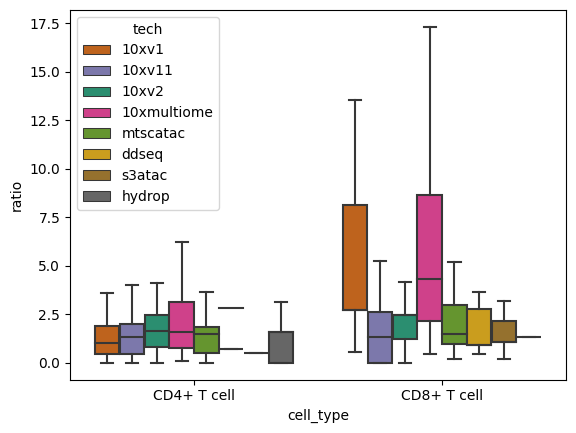

In [38]:
sns.boxplot(
    data=df_region_counts_merged,
    x="cell_type",
    y="ratio",
    hue="tech",
    hue_order=tech_order,
    palette=tech_color_palette,
    showfliers=False,
)

# instead try imputed accessibility

In [39]:
imputed_acc_obj_path = (
    "downstream_analysis/imputed_acc_objs/master_sub_1.FIXEDCELLS__imputed_acc_obs.pkl"
)
with open(imputed_acc_obj_path, "rb") as f:
    imputed_acc_obj = pickle.load(f)

In [40]:
# imputed_acc_obj_path = "/lustre1/project/stg_00090/scatac_benchmark/fixedcells_4_merged/downstream_analysis/imputed_acc_objs/master_all_1.FIXEDCELLS__normalized_imputed_acc_obs.pkl"
# with open(imputed_acc_obj_path, "rb") as f:
#     imputed_acc_obj = pickle.load(f)

In [41]:
# import pickle

# cto_path = "/lustre1/project/stg_00090/scatac_benchmark/fixedcells_4_merged/cistopic_objects_master/master_all_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_24topics.dimreduc.consensus_harmony.pkl"
# with open(cto_path, "rb") as f:
#     cto = pickle.load(f)

In [42]:
cto.cell_data["fmx_sample"].fillna("none", inplace=True)
cto.cell_data["sex"] = [
    x.replace("sampleA", "Male").replace("sampleB", "Female")
    for x in cto.cell_data["fmx_sample"]
]

In [43]:
import numpy as np

In [44]:
imputed_acc_obj.mtx.shape

(198388, 38648)

In [45]:
sex_dict = {"Male": "Female", "Female": "Male"}

In [46]:
cto.cell_data

,cisTopic_log_nr_frag,cisTopic_nr_frag,cisTopic_log_nr_acc,cisTopic_nr_acc,Log_total_nr_frag,Log_unique_nr_frag,Total_nr_frag,Unique_nr_frag,Dupl_nr_frag,Dupl_rate,...,harmony_tSNE_LISI_by_tech_center,harmony_tSNE_LISI_by_consensus_cell_type,harmony_UMAP_LISI_by_sample_id,harmony_UMAP_LISI_by_tech,harmony_UMAP_LISI_by_center,harmony_UMAP_LISI_by_tech_center,harmony_UMAP_LISI_by_consensus_cell_type,pycisTopic_harmonyleiden_10_3.0,harmony_consensus_cell_type,sex
GGTTAGTTGGCTGCATTACGTACTCATA___OHS_s3atac_1.FIXEDCELLS,2.444045,278,2.434569,272,3.562887,3.543323,3655,3494,161,0.044049,...,2.012238,1.915221,2.493599,1.892346,1.896596,1.897759,1.952496,38,CD4+ T cell,Female
GGTTAGTTGCCAAGGCAAGCTCATTG___OHS_s3atac_2.FIXEDCELLS,3.535041,3428,3.479287,3015,4.291191,4.265219,19552,18417,1135,0.058050,...,1.557071,1.505440,4.586677,3.278822,3.305229,3.402339,1.575076,39,CD14+ monocyte,none
GAAGAGTATTTTGGTTCTCAGCTTGTCA___OHS_s3atac_1.FIXEDCELLS,3.768564,5869,3.707826,5103,4.322261,4.293959,21002,19677,1325,0.063089,...,2.387451,1.899898,9.508997,2.327844,3.434944,3.886113,1.096516,11,CD14+ monocyte,Female
GAAGAGTATTTGGCTCATATGTGTCGGA___OHS_s3atac_1.FIXEDCELLS,3.816109,6548,3.737352,5462,4.247384,4.213571,17676,16352,1324,0.074904,...,1.031262,1.000000,1.014569,1.014545,1.014545,1.014545,1.000000,49,B cell,Female
ATTGAGGATATATTGCAGCTCGCCGATC___OHS_s3atac_1.FIXEDCELLS,2.826075,670,2.155336,143,3.416807,3.393224,2611,2473,138,0.052853,...,1.723443,1.157792,2.735537,1.643065,1.642681,1.645704,1.402094,38,CD4+ T cell,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCACAGAGTGCCCGAT___VIB_10xv1_1.FIXEDCELLS,3.706974,5093,3.652053,4488,3.898999,3.760121,7925,5756,2169,0.273691,...,5.005375,1.079658,9.718539,5.608077,2.650609,6.417485,1.330171,16,CD4+ T cell,Male
CAGTGCGAGAATCAAC___VIB_10xv1_2.FIXEDCELLS,3.909984,8128,3.848928,7062,4.174118,4.088915,14932,12272,2660,0.178141,...,3.866824,1.000000,7.429787,5.927331,4.664796,6.451890,1.000000,41,B cell,Female
AATGCCAGTTTCGTTT___VIB_10xv1_2.FIXEDCELLS,3.918083,8281,3.851258,7100,4.226239,4.127429,16836,13410,3426,0.203493,...,6.519491,1.368990,10.115802,3.989937,5.218227,7.931997,1.105121,4,CD4+ T cell,Male
TCTAGTTCAATGATGA___VIB_10xv1_1.FIXEDCELLS,3.881271,7608,3.811106,6473,4.090223,3.961089,12309,9143,3166,0.257210,...,2.124767,1.074510,8.269224,4.677107,3.118001,5.776854,1.039936,16,CD4+ T cell,Male


In [91]:
df_region_counts_merged = pd.DataFrame()
for cell_type, sex in [("CD4+ T cell", "Male"), ("CD8+ T cell", "Female")]:
    print(cell_type)
    # for sex in ["Male", "Female"]:
    print("\t" + sex)
    for tech in cto.cell_data["tech"].unique():
        cell_barcodes = cto.cell_data[
            (cto.cell_data["consensus_cell_type"] == cell_type)
            & (cto.cell_data["sex"] == sex)
            & (cto.cell_data["tech"] == tech)
        ].index
        if not len(cell_barcodes) == 0:
            cell_barcodes_index = [
                list(imputed_acc_obj.cell_names).index(x) for x in cell_barcodes
            ]
            print(f"\t\t{tech} found {len(cell_barcodes)} {sex} cells")

            df_merged_sub = df_merged[
                (df_merged["cell_type_specific"] == cell_type + "s")
                & (df_merged["sex"] == sex)
            ]
            regions = list(
                df_merged_sub["chrom"]
                + ":"
                + [str(x) for x in df_merged_sub["start"]]
                + "-"
                + [str(x) for x in df_merged_sub["end"].astype(str)]
            )
            regions_index = [
                list(imputed_acc_obj.feature_names).index(x) for x in regions
            ]

            # now subset imputed acc obj for the main sex
            imputed_acc_obj_subset = imputed_acc_obj.mtx[
                np.ix_(regions_index[:], cell_barcodes_index[:])
            ]

            counts = [
                x / len(cell_barcodes)
                for x in imputed_acc_obj_subset.sum(axis=1).tolist()
            ]  # divide by the number of cell barcodes in this class

            # now calculate the same but for the opposite sex:
            sex2 = sex_dict[sex]
            cell_barcodes = cto.cell_data[
                (cto.cell_data["consensus_cell_type"] == cell_type)
                & (cto.cell_data["sex"] == sex2)
                & (cto.cell_data["tech"] == tech)
            ].index
            if not len(cell_barcodes) == 0:

                cell_barcodes_index = [
                    list(imputed_acc_obj.cell_names).index(x) for x in cell_barcodes
                ]
                print(f"\t\t{tech} found {len(cell_barcodes)} {sex2} cells")

                imputed_acc_obj_subset = imputed_acc_obj.mtx[
                    np.ix_(regions_index[:], cell_barcodes_index[:])
                ]
                counts_sex2 = [
                    x / len(cell_barcodes)
                    for x in imputed_acc_obj_subset.sum(axis=1).tolist()
                ]  # divide by the number of cell barcodes in this class

                # calculate the ratio

                df_region_counts = pd.DataFrame()
                # counts_padded = np.pad(counts, (0, len(cto_copy.cell_data) - len(counts)))
                df_region_counts[f"counts_{sex2}"] = counts_sex2
                df_region_counts[f"counts_secondary_sex"] = counts_sex2

            df_region_counts[f"counts_{sex}"] = counts
            df_region_counts[f"counts_main_sex"] = counts
            # df_region_counts["counts"] = df_region_counts / len(regions)
            # df_region_counts["counts"] = df_region_counts / len(cto_copy.cell_data)

            df_region_counts["cell_type"] = cell_type
            df_region_counts["sex"] = sex
            df_region_counts["tech"] = tech
            df_region_counts["ratio"] = (
                df_region_counts[f"counts_main_sex"]
                / df_region_counts[f"counts_secondary_sex"]
            )
            df_region_counts = df_region_counts.sort_values(
                "ratio", ascending=False
            ).reset_index(drop=True)
            df_region_counts["rank"] = df_region_counts.index
            print(len(df_region_counts))
            # append
            df_region_counts_merged = pd.concat(
                [df_region_counts_merged, df_region_counts]
            )

CD4+ T cell
	Male
		s3atac found 10 Male cells
		s3atac found 5 Female cells
1000
		10xmultiome found 869 Male cells
		10xmultiome found 679 Female cells
1000
		10xv11 found 352 Male cells
		10xv11 found 472 Female cells
1000
		hydrop found 317 Male cells
		hydrop found 499 Female cells
1000
		10xv2 found 258 Male cells
		10xv2 found 423 Female cells
1000
		ddseq found 385 Male cells
		ddseq found 273 Female cells
1000
		mtscatac found 660 Male cells
		mtscatac found 966 Female cells
1000
		10xv1 found 621 Male cells
		10xv1 found 888 Female cells
1000
CD8+ T cell
	Female
		s3atac found 71 Female cells
		s3atac found 76 Male cells
1000
		10xmultiome found 175 Female cells
		10xmultiome found 379 Male cells
1000
		10xv11 found 109 Female cells
		10xv11 found 286 Male cells
1000
		hydrop found 600 Female cells
		hydrop found 542 Male cells
1000
		10xv2 found 90 Female cells
		10xv2 found 224 Male cells
1000
		ddseq found 73 Female cells
		ddseq found 67 Male cells
1000
		mtscatac found 4

In [92]:
with pd.option_context(
    "display.max_rows",
    None,
    "display.max_columns",
    None,
    "display.precision",
    3,
):
    print(cto.cell_data.groupby(["sex", "tech"])["consensus_cell_type"].value_counts())

sex     tech         consensus_cell_type
Female  10xmultiome  CD4+ T cell             679
                     CD14+ monocyte          634
                     Natural killer cell     347
                     B cell                  209
                     CD8+ T cell             175
                     CD16+ monocyte           99
                     Dendritic cell           34
        10xv1        CD14+ monocyte          985
                     CD4+ T cell             888
                     Natural killer cell     282
                     B cell                  210
                     CD8+ T cell             152
                     CD16+ monocyte           94
                     Dendritic cell           29
        10xv11       CD4+ T cell             472
                     CD14+ monocyte          429
                     Natural killer cell     226
                     B cell                  141
                     CD8+ T cell             109
                     CD16+ m

In [93]:
cto.cell_data

,cisTopic_log_nr_frag,cisTopic_nr_frag,cisTopic_log_nr_acc,cisTopic_nr_acc,Log_total_nr_frag,Log_unique_nr_frag,Total_nr_frag,Unique_nr_frag,Dupl_nr_frag,Dupl_rate,...,harmony_tSNE_LISI_by_tech_center,harmony_tSNE_LISI_by_consensus_cell_type,harmony_UMAP_LISI_by_sample_id,harmony_UMAP_LISI_by_tech,harmony_UMAP_LISI_by_center,harmony_UMAP_LISI_by_tech_center,harmony_UMAP_LISI_by_consensus_cell_type,pycisTopic_harmonyleiden_10_3.0,harmony_consensus_cell_type,sex
GGTTAGTTGGCTGCATTACGTACTCATA___OHS_s3atac_1.FIXEDCELLS,2.444045,278,2.434569,272,3.562887,3.543323,3655,3494,161,0.044049,...,2.012238,1.915221,2.493599,1.892346,1.896596,1.897759,1.952496,38,CD4+ T cell,Female
GGTTAGTTGCCAAGGCAAGCTCATTG___OHS_s3atac_2.FIXEDCELLS,3.535041,3428,3.479287,3015,4.291191,4.265219,19552,18417,1135,0.058050,...,1.557071,1.505440,4.586677,3.278822,3.305229,3.402339,1.575076,39,CD14+ monocyte,none
GAAGAGTATTTTGGTTCTCAGCTTGTCA___OHS_s3atac_1.FIXEDCELLS,3.768564,5869,3.707826,5103,4.322261,4.293959,21002,19677,1325,0.063089,...,2.387451,1.899898,9.508997,2.327844,3.434944,3.886113,1.096516,11,CD14+ monocyte,Female
GAAGAGTATTTGGCTCATATGTGTCGGA___OHS_s3atac_1.FIXEDCELLS,3.816109,6548,3.737352,5462,4.247384,4.213571,17676,16352,1324,0.074904,...,1.031262,1.000000,1.014569,1.014545,1.014545,1.014545,1.000000,49,B cell,Female
ATTGAGGATATATTGCAGCTCGCCGATC___OHS_s3atac_1.FIXEDCELLS,2.826075,670,2.155336,143,3.416807,3.393224,2611,2473,138,0.052853,...,1.723443,1.157792,2.735537,1.643065,1.642681,1.645704,1.402094,38,CD4+ T cell,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCACAGAGTGCCCGAT___VIB_10xv1_1.FIXEDCELLS,3.706974,5093,3.652053,4488,3.898999,3.760121,7925,5756,2169,0.273691,...,5.005375,1.079658,9.718539,5.608077,2.650609,6.417485,1.330171,16,CD4+ T cell,Male
CAGTGCGAGAATCAAC___VIB_10xv1_2.FIXEDCELLS,3.909984,8128,3.848928,7062,4.174118,4.088915,14932,12272,2660,0.178141,...,3.866824,1.000000,7.429787,5.927331,4.664796,6.451890,1.000000,41,B cell,Female
AATGCCAGTTTCGTTT___VIB_10xv1_2.FIXEDCELLS,3.918083,8281,3.851258,7100,4.226239,4.127429,16836,13410,3426,0.203493,...,6.519491,1.368990,10.115802,3.989937,5.218227,7.931997,1.105121,4,CD4+ T cell,Male
TCTAGTTCAATGATGA___VIB_10xv1_1.FIXEDCELLS,3.881271,7608,3.811106,6473,4.090223,3.961089,12309,9143,3166,0.257210,...,2.124767,1.074510,8.269224,4.677107,3.118001,5.776854,1.039936,16,CD4+ T cell,Male


0    0      True
1      True
2      True
3      Tru...
dtype: object

Text(0, 0.5, 'Ratio of counts in Male vs Female CD4+ T cells')

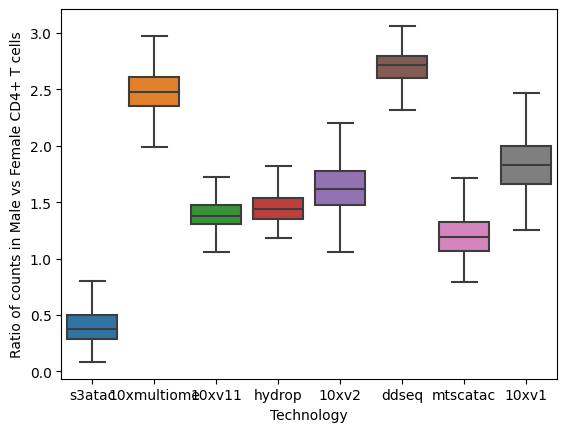

In [95]:
# CD4
sns.boxplot(
    data=df_region_counts_merged[df_region_counts_merged["cell_type"] == "CD4+ T cell"],
    x="tech",
    y="ratio",
    # hue="tech",
    # hue_order=tech_order,
    # palette=tech_color_palette,
    showfliers=False,
)

plt.xlabel("Technology")
plt.ylabel("Ratio of counts in Male vs Female CD4+ T cells")

# CD8

In [108]:
with pd.option_context(
    "display.max_rows",
    None,
    "display.max_columns",
    None,
    "display.precision",
    3,
):

    print(df_region_counts_merged[df_region_counts_merged["tech"] == "ddseq"]["ratio"])

0        inf
1        inf
2      4.279
3      4.226
4      3.454
5      3.269
6      3.246
7      3.231
8      3.224
9      3.183
10     3.157
11     3.154
12     3.152
13     3.144
14     3.142
15     3.142
16     3.140
17     3.139
18     3.133
19     3.131
20     3.126
21     3.119
22     3.115
23     3.104
24     3.102
25     3.092
26     3.085
27     3.085
28     3.062
29     3.061
30     3.056
31     3.039
32     3.036
33     3.034
34     3.033
35     3.032
36     3.029
37     3.027
38     3.026
39     3.023
40     3.022
41     3.021
42     3.020
43     3.019
44     3.016
45     3.015
46     3.011
47     3.006
48     3.004
49     3.003
50     3.002
51     3.001
52     2.996
53     2.995
54     2.987
55     2.986
56     2.982
57     2.981
58     2.980
59     2.979
60     2.979
61     2.977
62     2.976
63     2.972
64     2.970
65     2.968
66     2.967
67     2.967
68     2.962
69     2.961
70     2.960
71     2.955
72     2.954
73     2.953
74     2.949
75     2.949
76     2.941

<AxesSubplot: xlabel='counts_Female', ylabel='counts_Male'>

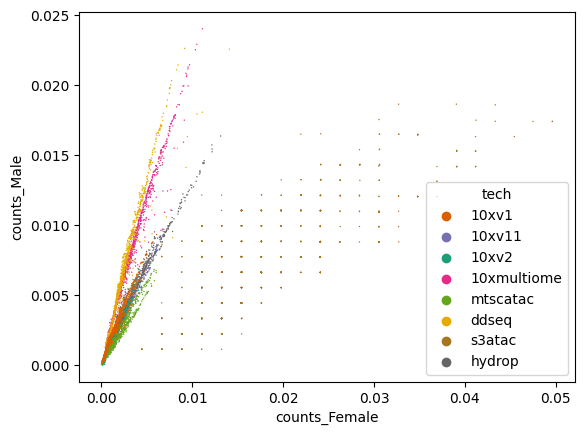

In [97]:
sns.scatterplot(
    data=df_region_counts_merged[df_region_counts_merged["sex"] == "Male"],
    x="counts_Female",
    y="counts_Male",
    hue="tech",
    hue_order=tech_order,
    palette=tech_color_palette,
    s=1,
    linewidth=0,
)

(0.0, 0.05)

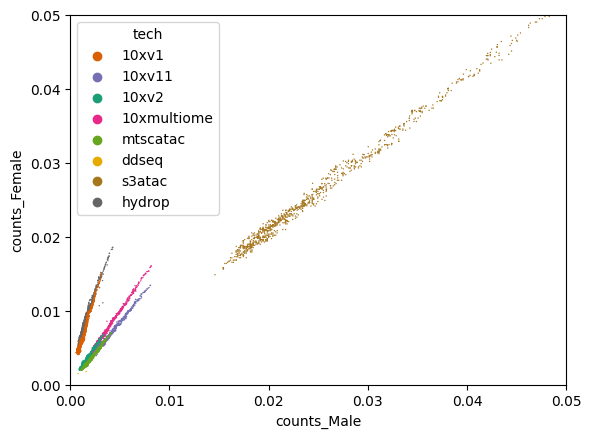

In [98]:
sns.scatterplot(
    data=df_region_counts_merged[df_region_counts_merged["sex"] == "Female"],
    x="counts_Male",
    y="counts_Female",
    hue="tech",
    hue_order=tech_order,
    palette=tech_color_palette,
    s=1,
    linewidth=0,
)
plt.xlim([0, 0.05])
plt.ylim([0, 0.05])

In [122]:
df_region_counts_merged["Technology"] = [
    tech_alias_dict[x] for x in df_region_counts_merged["tech"]
]

In [123]:
tech_alias_color_palette = {
    tech_alias_dict[x]: tech_color_palette[x] for x in tech_color_palette.keys()
}

In [124]:
tech_alias_order = [tech_alias_dict[x] for x in tech_order]

In [125]:
label_alias_dict = {
    "CD4+ T cell": "CD4+ T cells\nAccessibility in male/female",
    "CD8+ T cell": "CD8+ T cells\nAccessibility in female/male",
}

In [126]:
df_region_counts_merged["label"] = [
    label_alias_dict[x] for x in df_region_counts_merged["cell_type"]
]

In [127]:
df_region_counts_merged[df_region_counts_merged["tech"] == "ddseq"]

,counts_Female,counts_secondary_sex,counts_Male,counts_main_sex,cell_type,sex,tech,ratio,rank,Technology,label
0,0.000000,0.000000,0.000029,0.000029,CD4+ T cell,Male,ddseq,inf,0,ddSEQ SureCell,CD4+ T cells\nAccessibility in male/female
1,0.000000,0.000000,0.000057,0.000057,CD4+ T cell,Male,ddseq,inf,1,ddSEQ SureCell,CD4+ T cells\nAccessibility in male/female
2,0.000040,0.000040,0.000170,0.000170,CD4+ T cell,Male,ddseq,4.279230,2,ddSEQ SureCell,CD4+ T cells\nAccessibility in male/female
3,0.000040,0.000040,0.000171,0.000171,CD4+ T cell,Male,ddseq,4.226387,3,ddSEQ SureCell,CD4+ T cells\nAccessibility in male/female
4,0.000674,0.000674,0.002327,0.002327,CD4+ T cell,Male,ddseq,3.454335,4,ddSEQ SureCell,CD4+ T cells\nAccessibility in male/female
...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.000000,0.000000,0.000000,CD8+ T cell,Female,ddseq,NaN,995,ddSEQ SureCell,CD8+ T cells\nAccessibility in female/male
996,0.000000,0.000000,0.000000,0.000000,CD8+ T cell,Female,ddseq,NaN,996,ddSEQ SureCell,CD8+ T cells\nAccessibility in female/male
997,0.000000,0.000000,0.000000,0.000000,CD8+ T cell,Female,ddseq,NaN,997,ddSEQ SureCell,CD8+ T cells\nAccessibility in female/male
998,0.000000,0.000000,0.000000,0.000000,CD8+ T cell,Female,ddseq,NaN,998,ddSEQ SureCell,CD8+ T cells\nAccessibility in female/male


In [121]:
df_region_counts_merged[~pd.Series(df_region_counts_merged["ratio"] == np.inf)]

,counts_Female,counts_secondary_sex,counts_Male,counts_main_sex,cell_type,sex,tech,ratio,rank,Technology,label
0,0.002214,0.002214,0.005529,0.005529,CD4+ T cell,Male,s3atac,2.496879,0,s3-ATAC,CD4+ T cells\nAccessibility in male/female
1,0.002214,0.002214,0.004424,0.004424,CD4+ T cell,Male,s3atac,1.997815,1,s3-ATAC,CD4+ T cells\nAccessibility in male/female
2,0.004426,0.004426,0.005529,0.005529,CD4+ T cell,Male,s3atac,1.249179,2,s3-ATAC,CD4+ T cells\nAccessibility in male/female
3,0.006636,0.006636,0.007740,0.007740,CD4+ T cell,Male,s3atac,1.166474,3,s3-ATAC,CD4+ T cells\nAccessibility in male/female
4,0.006636,0.006636,0.007740,0.007740,CD4+ T cell,Male,s3atac,1.166474,4,s3-ATAC,CD4+ T cells\nAccessibility in male/female
...,...,...,...,...,...,...,...,...,...,...,...
995,0.006046,0.001410,0.001410,0.006046,CD8+ T cell,Female,10xv1,4.288472,995,10x v1,CD8+ T cells\nAccessibility in female/male
996,0.006259,0.001463,0.001463,0.006259,CD8+ T cell,Female,10xv1,4.276949,996,10x v1,CD8+ T cells\nAccessibility in female/male
997,0.006116,0.001436,0.001436,0.006116,CD8+ T cell,Female,10xv1,4.259738,997,10x v1,CD8+ T cells\nAccessibility in female/male
998,0.005976,0.001410,0.001410,0.005976,CD8+ T cell,Female,10xv1,4.238831,998,10x v1,CD8+ T cells\nAccessibility in female/male


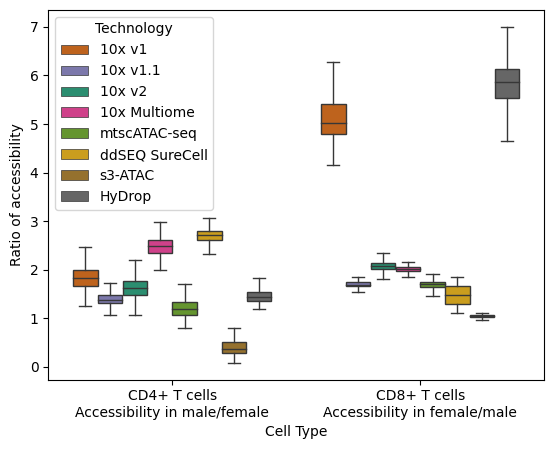

In [133]:
sns.boxplot(
    data=df_region_counts_merged[
        ~pd.Series(df_region_counts_merged["ratio"] == np.inf)
    ],
    x="label",
    y="ratio",
    hue="Technology",
    hue_order=tech_alias_order,
    palette=tech_alias_color_palette,
    showfliers=False,
    linewidth=1,
)
plt.xlabel("Cell Type")
plt.ylabel("Ratio of accessibility")
plt.savefig(
    "plts_final/male_female_dar_accessibility.png",
    dpi=300,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/male_female_dar_accessibility.svg",
    dpi=300,
    facecolor="white",
    bbox_inches="tight",
)

<AxesSubplot: xlabel='cell_type', ylabel='counts_Female'>

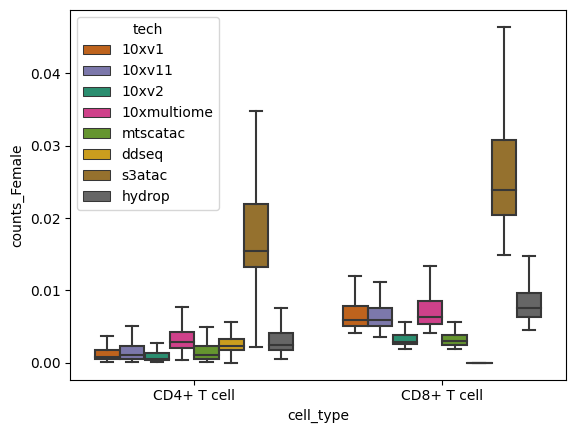

In [56]:
sns.boxplot(
    data=df_region_counts_merged,
    x="cell_type",
    y="counts_Female",
    hue="tech",
    hue_order=tech_order,
    palette=tech_color_palette,
    showfliers=False,
)

<AxesSubplot: xlabel='cell_type', ylabel='counts_Male'>

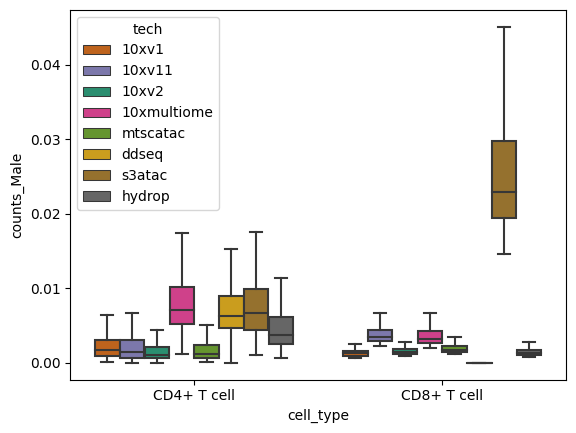

In [57]:
sns.boxplot(
    data=df_region_counts_merged,
    x="cell_type",
    y="counts_Male",
    hue="tech",
    hue_order=tech_order,
    palette=tech_color_palette,
    showfliers=False,
)

/opt/venv/lib/python3.8/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<AxesSubplot: xlabel='cell_type', ylabel='ratio'>

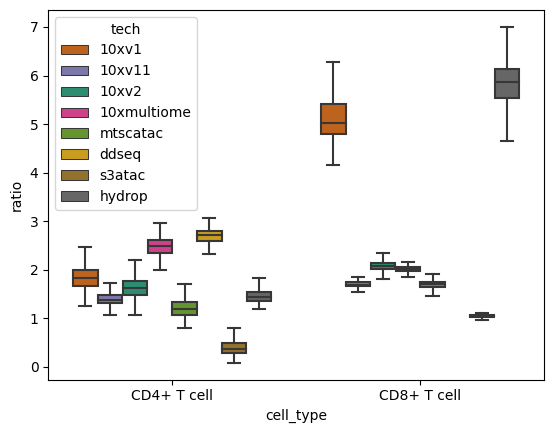

In [58]:
sns.boxplot(
    data=df_region_counts_merged,
    x="cell_type",
    y="ratio",
    hue="tech",
    hue_order=tech_order,
    palette=tech_color_palette,
    showfliers=False,
)

# repeat this with the harmony dars

# male female DARs

In [ ]:
dar_path_dict_dict = {
    y: {
        z.split("/")[-1].split("__")[-2]: z
        for z in sorted(glob.glob("harmony_male_female_DARs/" + y + "/*_DARs.bed"))
    }
    for y in [x.split("/")[-1] for x in sorted(glob.glob("male_female_DARs/*"))]
}
dar_path_dict_dict

In [ ]:
dar_path_dict_dict

In [ ]:
df_merged = pd.DataFrame()
for sample, dar_path_dict in dar_path_dict_dict.items():
    print(sample)
    for cell_type, dar_path in dar_path_dict.items():
        print(cell_type)
        df = pd.read_csv(dar_path, sep="\t", header=None)
        df["sample"] = sample
        df_merged = pd.concat([df_merged, df.iloc[:1000]])

In [ ]:
df_merged.columns = [
    "chrom",
    "start",
    "end",
    "cell_type",
    "logfc",
    "strand",
    "p_val",
    "sample",
]

In [ ]:
df_merged["tech"] = [x.split("_")[1] for x in df_merged["sample"]]

In [ ]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

tech_order = [
    "10xv1",
    "10xv11",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "ddseq",
    "s3atac",
    "hydrop",
]

tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "s3atac": "s3-ATAC",
}

cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "CD4+ T cells",
    "Cytotoxic_T_cell": "CD8+ T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "NK cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

cell_type_order = [
    "B_cell",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Natural_killer_cell",
    "CD14+_monocyte",
    "CD16+_monocyte",
    "Dendritic_cell",
]

In [ ]:
df_merged

In [ ]:
cell_type_alias_dict

In [ ]:
cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "CD4+ T cells",
    "Cytotoxic_T_cell": "CD8+ T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "NK cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

cell_type_order = [
    "B_cell",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Natural_killer_cell",
    "CD14+_monocyte",
    "CD16+_monocyte",
    "Dendritic_cell",
]

In [ ]:
df_merged["cell_type_specific"] = [
    cell_type_alias_dict[
        x.replace("sampleA_", "").replace("sampleB_", "").split("_VS_")[0]
    ]
    for x in df_merged["cell_type"]
]

In [ ]:
cell_type_alias_dict

In [ ]:
df_merged = df_merged.sort_values(["cell_type_specific", "cell_type"])

In [ ]:
df_merged["sex"] = [
    x.split("_")[0]
    .replace("_", " ")
    .replace("sampleA", "Male")
    .replace("sampleB", "Female")
    for x in df_merged["cell_type"]
]

In [ ]:
# cell_type_alias_dict = {
#     x: x.split("_VS_")[0]
#     .replace("_", " ")
#     .replace("sampleA", "Male")
#     .replace("sampleB", "Female")
#     + "s"
#     for x in labels
# }

In [ ]:
# cell_type_alias_dict = {
#     "sampleA_B_cell_VS_sampleB_B_cell": "Male B cells",
#     "sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte": "Male CD14+ monocytes",
#     "sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte": "Male CD16+ monocytes",
#     "sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell": "Male CD4+ T cells",
#     "sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell": "Male Cytotoxic T cells",
#     "sampleA_Natural_killer_cell_VS_sampleB_Natural_killer_cell": "Male Natural killer cells",
#     "sampleB_B_cell_VS_sampleA_B_cell": "Female B cells",
#     "sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte": "Female CD14+ monocytes",
#     "sampleB_CD16+_monocyte_VS_sampleA_CD16+_monocyte": "Female CD16+ monocytes",
#     "sampleB_CD4+_T_cell_VS_sampleA_CD4+_T_cell": "Female CD4+ T cells",
#     "sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell": "Female Cytotoxic T cells",
#     "sampleB_Natural_killer_cell_VS_sampleA_Natural_killer_cell": "Female Natural killer cells",
# }

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(
    df_merged,
    x="cell_type_specific",
    y="logfc",
    hue="sex",
    # order=cell_type_order,
    order=[cell_type_alias_dict[x] for x in cell_type_order],
    # palette=tech_color_palette,
    ax=ax,
    fliersize=0,
    showfliers=False,
)
plt.xticks(rotation=45, ha="right")

plt.ylabel("Log2(fold enrichment)\nof top 1000 DARs")
plt.xlabel("")
# labels = [item.get_text() for item in ax.get_xticklabels()]
# labels_alias = [cell_type_alias_dict[x] for x in labels]
# x.set_xticklabels(labels_alias)


# handles, labels = ax.get_legend_handles_labels()
# l = plt.legend(
#     handles[0 : len(tech_order)],
#     [tech_alias_dict[x] for x in labels[0 : len(tech_order)]],
#     bbox_to_anchor=(1.05, 1),
#     loc=2,
#     borderaxespad=0.0,
# )
plt.tight_layout()
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_top1k_DARs_logfc.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_top1k_DARs_logfc.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)

# calculate accessibility in these DARs

In [ ]:
import pickle

cto_path = "cistopic_objects/master_sub_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_20topics.dimreduc.consensus_harmony.pkl"
with open(cto_path, "rb") as f:
    cto = pickle.load(f)

In [ ]:
df_merged

In [ ]:
cto.cell_data["harmony_consensus_cell_type"] = [
    x.replace("Cytotoxic T cell", "CD8+ T cell")
    for x in cto.cell_data["harmony_consensus_cell_type"]
]

In [ ]:
cto.cell_data["fmx_sample"].value_counts()

In [ ]:
cto.cell_data["fmx_droplet_type"].value_counts()

In [ ]:
13908 + 13583

In [ ]:
tmp_df = cto.cell_data.copy()

In [ ]:
tmp_df["fmx_sample"].fillna("none", inplace=True)
tmp_df.groupby("tech")["fmx_sample"].value_counts()

In [ ]:
cto.cell_data["fmx_sample"].fillna("none", inplace=True)
cto.cell_data["sex"] = [
    x.replace("sampleA", "Male").replace("sampleB", "Female")
    for x in cto.cell_data["fmx_sample"]
]

In [ ]:
cto.cell_data["sex"]

In [ ]:
df_region_counts_merged = pd.DataFrame()
for cell_type, sex in [("CD4+ T cell", "Male"), ("CD8+ T cell", "Female")]:
    print(cell_type)
    # for sex in ["Male", "Female"]:
    print("\t" + sex)
    for tech in cto.cell_data["tech"].unique():
        cell_barcodes = cto.cell_data[
            (cto.cell_data["harmony_consensus_cell_type"] == cell_type)
            & (cto.cell_data["sex"] == sex)
            & (cto.cell_data["tech"] == tech)
        ].index
        df_merged_sub = df_merged[
            (df_merged["cell_type_specific"] == cell_type + "s")
            & (df_merged["sex"] == sex)
        ]
        regions = list(
            df_merged_sub["chrom"]
            + ":"
            + [str(x) for x in df_merged_sub["start"]]
            + "-"
            + [str(x) for x in df_merged_sub["end"].astype(str)]
        )

        cto_copy = cto.subset(cells=cell_barcodes, regions=regions, copy=True)
        print(f"\t\t{tech} found {len(cto_copy.cell_data)} cells")

        # now count
        counts = [
            x / len(cell_barcodes)
            for x in list(x[0, 0] for x in cto_copy.fragment_matrix.sum(axis=1))
        ]
        counts_padded = np.pad(counts, (0, len(regions) - len(counts)))
        # counts = cto_copy.fragment_matrix.sum(axis=0).tolist()[0]
        # counts_padded = np.pad(counts, (0, len(regions) - len(counts)))
        # df_region_counts["counts"] = df_region_counts / len(regions)
        # df_region_counts["counts"] = df_region_counts / len(cto_copy.cell_data)

        # now calculate the same for the other sex
        sex2 = sex_dict[sex]
        cell_barcodes = cto.cell_data[
            (cto.cell_data["harmony_consensus_cell_type"] == cell_type)
            & (cto.cell_data["sex"] == sex2)
            & (cto.cell_data["tech"] == tech)
        ].index
        cto_copy = cto.subset(cells=cell_barcodes, regions=regions, copy=True)
        print(f"\t\t{tech} found {len(cto_copy.cell_data)} cells")
        counts2 = [
            x / len(cell_barcodes)
            for x in list(x[0, 0] for x in cto_copy.fragment_matrix.sum(axis=1))
        ]
        counts_padded2 = np.pad(counts2, (0, len(regions) - len(counts2)))

        # add to df
        df_region_counts = pd.DataFrame()
        df_region_counts["counts"] = counts_padded
        df_region_counts["counts2"] = counts_padded2
        df_region_counts["ratio"] = (
            df_region_counts["counts"] / df_region_counts["counts2"]
        )

        df_region_counts["cell_type"] = cell_type
        df_region_counts["sex"] = sex
        df_region_counts["tech"] = tech
        df_region_counts = df_region_counts.sort_values(
            "counts", ascending=False
        ).reset_index(drop=True)
        df_region_counts["rank"] = df_region_counts.index

        # append
        df_region_counts_merged = pd.concat([df_region_counts_merged, df_region_counts])

In [ ]:
df_region_counts_merged

In [ ]:
sns.boxplot(
    data=df_region_counts_merged,
    x="cell_type",
    y="ratio",
    hue="tech",
    hue_order=tech_order,
    palette=tech_color_palette,
    showfliers=False,
)

In [ ]:
df_region_counts_merged["log2_counts"] = np.log2(df_region_counts_merged["counts"])
df_region_counts_merged["log_counts"] = np.log(df_region_counts_merged["counts"])
df_region_counts_merged["log_counts"] = df_region_counts_merged["log_counts"].replace(
    -np.inf, 0
)

In [ ]:
sns.boxplot(
    data=df_region_counts_merged,
    x="cell_type",
    y="log_counts",
    hue="tech",
    hue_order=tech_order,
    palette=tech_color_palette,
    showfliers=False,
)

In [ ]:
df_region_counts_merged

In [ ]:
df_region_counts_merged

# instead try imputed accessibility

In [ ]:
imputed_acc_obj_path = (
    "downstream_analysis/imputed_acc_objs/master_sub_1.FIXEDCELLS__imputed_acc_obs.pkl"
)
with open(imputed_acc_obj_path, "rb") as f:
    imputed_acc_obj = pickle.load(f)

In [ ]:
# imputed_acc_obj_path = "/lustre1/project/stg_00090/scatac_benchmark/fixedcells_4_merged/downstream_analysis/imputed_acc_objs/master_all_1.FIXEDCELLS__normalized_imputed_acc_obs.pkl"
# with open(imputed_acc_obj_path, "rb") as f:
#     imputed_acc_obj = pickle.load(f)

In [ ]:
# import pickle

# cto_path = "/lustre1/project/stg_00090/scatac_benchmark/fixedcells_4_merged/cistopic_objects_master/master_all_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_24topics.dimreduc.consensus_harmony.pkl"
# with open(cto_path, "rb") as f:
#     cto = pickle.load(f)

In [ ]:
cto.cell_data["fmx_sample"].fillna("none", inplace=True)
cto.cell_data["sex"] = [
    x.replace("sampleA", "Male").replace("sampleB", "Female")
    for x in cto.cell_data["fmx_sample"]
]

In [ ]:
import numpy as np

In [ ]:
imputed_acc_obj.mtx.shape

In [ ]:
sex_dict = {"Male": "Female", "Female": "Male"}

In [ ]:
cto.cell_data

In [ ]:
df_region_counts_merged = pd.DataFrame()
for cell_type, sex in [("CD4+ T cell", "Male"), ("CD8+ T cell", "Female")]:
    print(cell_type)
    # for sex in ["Male", "Female"]:
    print("\t" + sex)
    for tech in cto.cell_data["tech"].unique():
        cell_barcodes = cto.cell_data[
            (cto.cell_data["harmony_consensus_cell_type"] == cell_type)
            & (cto.cell_data["sex"] == sex)
            & (cto.cell_data["tech"] == tech)
        ].index
        cell_barcodes_index = [
            list(imputed_acc_obj.cell_names).index(x) for x in cell_barcodes
        ]
        print(f"\t\t{tech} found {len(cell_barcodes)} {sex} cells")

        df_merged_sub = df_merged[
            (df_merged["cell_type_specific"] == cell_type + "s")
            & (df_merged["sex"] == sex)
        ]
        regions = list(
            df_merged_sub["chrom"]
            + ":"
            + [str(x) for x in df_merged_sub["start"]]
            + "-"
            + [str(x) for x in df_merged_sub["end"].astype(str)]
        )
        regions_index = [list(imputed_acc_obj.feature_names).index(x) for x in regions]

        # now subset imputed acc obj for the main sex
        imputed_acc_obj_subset = imputed_acc_obj.mtx[
            np.ix_(regions_index[:], cell_barcodes_index[:])
        ]

        counts = [
            x / len(cell_barcodes) for x in imputed_acc_obj_subset.sum(axis=1).tolist()
        ]  # divide by the number of cell barcodes in this class

        # now calculate the same but for the opposite sex:
        sex2 = sex_dict[sex]
        cell_barcodes = cto.cell_data[
            (cto.cell_data["harmony_consensus_cell_type"] == cell_type)
            & (cto.cell_data["sex"] == sex2)
            & (cto.cell_data["tech"] == tech)
        ].index
        cell_barcodes_index = [
            list(imputed_acc_obj.cell_names).index(x) for x in cell_barcodes
        ]
        print(f"\t\t{tech} found {len(cell_barcodes)} {sex2} cells")

        imputed_acc_obj_subset = imputed_acc_obj.mtx[
            np.ix_(regions_index[:], cell_barcodes_index[:])
        ]
        counts_sex2 = [
            x / len(cell_barcodes) for x in imputed_acc_obj_subset.sum(axis=1).tolist()
        ]  # divide by the number of cell barcodes in this class

        # calculate the ratio

        df_region_counts = pd.DataFrame()
        # counts_padded = np.pad(counts, (0, len(cto_copy.cell_data) - len(counts)))

        df_region_counts[f"counts_{sex}"] = counts
        df_region_counts[f"counts_{sex2}"] = counts_sex2
        df_region_counts[f"counts_main_sex"] = counts
        df_region_counts[f"counts_secondary_sex"] = counts_sex2
        # df_region_counts["counts"] = df_region_counts / len(regions)
        # df_region_counts["counts"] = df_region_counts / len(cto_copy.cell_data)

        df_region_counts["cell_type"] = cell_type
        df_region_counts["sex"] = sex
        df_region_counts["tech"] = tech
        df_region_counts["ratio"] = (
            df_region_counts[f"counts_main_sex"]
            / df_region_counts[f"counts_secondary_sex"]
        )
        df_region_counts = df_region_counts.sort_values(
            "ratio", ascending=False
        ).reset_index(drop=True)
        df_region_counts["rank"] = df_region_counts.index
        print(len(df_region_counts))
        # append
        df_region_counts_merged = pd.concat([df_region_counts_merged, df_region_counts])

In [ ]:
with pd.option_context(
    "display.max_rows",
    None,
    "display.max_columns",
    None,
    "display.precision",
    3,
):
    print(
        cto.cell_data.groupby(["sex", "tech"])[
            "harmony_consensus_cell_type"
        ].value_counts()
    )

In [ ]:
cto.cell_data

In [ ]:
sns.boxplot(
    data=df_region_counts_merged,
    x="cell_type",
    y="ratio",
    hue="tech",
    hue_order=tech_order,
    palette=tech_color_palette,
    showfliers=False,
)

In [ ]:
df_region_counts

In [ ]:
sns.scatterplot(
    data=df_region_counts_merged[df_region_counts_merged["sex"] == "Male"],
    x="counts_Female",
    y="counts_Male",
    hue="tech",
    hue_order=tech_order,
    palette=tech_color_palette,
    s=1,
    linewidth=0,
)

In [ ]:
sns.scatterplot(
    data=df_region_counts_merged[df_region_counts_merged["sex"] == "Female"],
    x="counts_Male",
    y="counts_Female",
    hue="tech",
    hue_order=tech_order,
    palette=tech_color_palette,
    s=1,
    linewidth=0,
)
plt.xlim([0, 0.05])
plt.ylim([0, 0.05])

In [ ]:
sns.boxplot(
    data=df_region_counts_merged,
    x="cell_type",
    y="ratio",
    hue="tech",
    hue_order=tech_order,
    palette=tech_color_palette,
    showfliers=False,
)

In [ ]:
sns.boxplot(
    data=df_region_counts_merged,
    x="cell_type",
    y="counts_Female",
    hue="tech",
    hue_order=tech_order,
    palette=tech_color_palette,
    showfliers=False,
)

# repeat this with the seurat dars

In [ ]:
dar_path_dict_dict = {
    y: {
        z.split("/")[-1].split("__")[-2]: z
        for z in sorted(glob.glob("seurat_male_female_DARs/" + y + "/*_DARs.bed"))
    }
    for y in [x.split("/")[-1] for x in sorted(glob.glob("male_female_DARs/*"))]
}
dar_path_dict_dict

In [ ]:
df_merged = pd.DataFrame()
for sample, dar_path_dict in dar_path_dict_dict.items():
    print(sample)
    for cell_type, dar_path in dar_path_dict.items():
        print(cell_type)
        df = pd.read_csv(dar_path, sep="\t", header=None)
        df["sample"] = sample
        df_merged = pd.concat([df_merged, df.iloc[:1000]])

In [ ]:
df_merged.columns = [
    "chrom",
    "start",
    "end",
    "cell_type",
    "logfc",
    "strand",
    "p_val",
    "sample",
]

In [ ]:
df_merged["tech"] = [x.split("_")[1] for x in df_merged["sample"]]

In [ ]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

tech_order = [
    "10xv1",
    "10xv11",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "ddseq",
    "s3atac",
    "hydrop",
]

tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "s3atac": "s3-ATAC",
}

cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "CD4+ T cells",
    "Cytotoxic_T_cell": "CD8+ T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "NK cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

cell_type_order = [
    "B_cell",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Natural_killer_cell",
    "CD14+_monocyte",
    "CD16+_monocyte",
    "Dendritic_cell",
]

In [ ]:
df_merged

In [ ]:
cell_type_alias_dict

In [ ]:
cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "CD4+ T cells",
    "Cytotoxic_T_cell": "CD8+ T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "NK cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

cell_type_order = [
    "B_cell",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Natural_killer_cell",
    "CD14+_monocyte",
    "CD16+_monocyte",
    "Dendritic_cell",
]

In [ ]:
df_merged["cell_type_specific"] = [
    cell_type_alias_dict[
        x.replace("sampleA_", "").replace("sampleB_", "").split("_VS_")[0]
    ]
    for x in df_merged["cell_type"]
]

In [ ]:
cell_type_alias_dict

In [ ]:
df_merged = df_merged.sort_values(["cell_type_specific", "cell_type"])

In [ ]:
df_merged["sex"] = [
    x.split("_")[0]
    .replace("_", " ")
    .replace("sampleA", "Male")
    .replace("sampleB", "Female")
    for x in df_merged["cell_type"]
]

In [ ]:
# cell_type_alias_dict = {
#     x: x.split("_VS_")[0]
#     .replace("_", " ")
#     .replace("sampleA", "Male")
#     .replace("sampleB", "Female")
#     + "s"
#     for x in labels
# }

In [ ]:
# cell_type_alias_dict = {
#     "sampleA_B_cell_VS_sampleB_B_cell": "Male B cells",
#     "sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte": "Male CD14+ monocytes",
#     "sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte": "Male CD16+ monocytes",
#     "sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell": "Male CD4+ T cells",
#     "sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell": "Male Cytotoxic T cells",
#     "sampleA_Natural_killer_cell_VS_sampleB_Natural_killer_cell": "Male Natural killer cells",
#     "sampleB_B_cell_VS_sampleA_B_cell": "Female B cells",
#     "sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte": "Female CD14+ monocytes",
#     "sampleB_CD16+_monocyte_VS_sampleA_CD16+_monocyte": "Female CD16+ monocytes",
#     "sampleB_CD4+_T_cell_VS_sampleA_CD4+_T_cell": "Female CD4+ T cells",
#     "sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell": "Female Cytotoxic T cells",
#     "sampleB_Natural_killer_cell_VS_sampleA_Natural_killer_cell": "Female Natural killer cells",
# }

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(
    df_merged,
    x="cell_type_specific",
    y="logfc",
    hue="sex",
    # order=cell_type_order,
    order=[cell_type_alias_dict[x] for x in cell_type_order],
    # palette=tech_color_palette,
    ax=ax,
    fliersize=0,
    showfliers=False,
)
plt.xticks(rotation=45, ha="right")

plt.ylabel("Log2(fold enrichment)\nof top 1000 DARs")
plt.xlabel("")
# labels = [item.get_text() for item in ax.get_xticklabels()]
# labels_alias = [cell_type_alias_dict[x] for x in labels]
# x.set_xticklabels(labels_alias)


# handles, labels = ax.get_legend_handles_labels()
# l = plt.legend(
#     handles[0 : len(tech_order)],
#     [tech_alias_dict[x] for x in labels[0 : len(tech_order)]],
#     bbox_to_anchor=(1.05, 1),
#     loc=2,
#     borderaxespad=0.0,
# )
plt.tight_layout()
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_top1k_DARs_logfc.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_top1k_DARs_logfc.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)

In [ ]:
sample = "master_sub_1.FIXEDCELLS"
with open(
    "cistopic_objects/master_sub_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_20topics.dimreduc.consensus_harmony.pkl",
    "rb",
) as f:
    cto = pickle.load(f)

In [ ]:
with open(
    "/lustre1/project/stg_00090/scatac_benchmark/fixedcells_4_merged/cistopic_objects_master/master_all_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_24topics.dimreduc.consensus_harmony.pkl",
    "rb",
) as f:
    cto_all = pickle.load(f)

In [ ]:
cto.cell_data["seurat_cell_type__mega"] = cto_all.cell_data["cell_type__mega"]

In [ ]:
cto.cell_data["seurat_cell_type__mega"] = [
    x.replace("Cytotoxic T cell", "CD8+ T cell")
    for x in cto.cell_data["seurat_cell_type__mega"]
]

In [ ]:
cto.cell_data["fmx_sample"].value_counts()

In [ ]:
cto.cell_data["fmx_droplet_type"].value_counts()

In [ ]:
13908 + 13583

In [ ]:
tmp_df = cto.cell_data.copy()

In [ ]:
tmp_df["fmx_sample"].fillna("none", inplace=True)
tmp_df.groupby("tech")["fmx_sample"].value_counts()

In [ ]:
cto.cell_data["fmx_sample"].fillna("none", inplace=True)
cto.cell_data["sex"] = [
    x.replace("sampleA", "Male").replace("sampleB", "Female")
    for x in cto.cell_data["fmx_sample"]
]

In [ ]:
cto.cell_data["sex"]

In [ ]:
df_region_counts_merged = pd.DataFrame()
for cell_type, sex in [("CD4+ T cell", "Male"), ("CD8+ T cell", "Female")]:
    print(cell_type)
    # for sex in ["Male", "Female"]:
    print("\t" + sex)
    for tech in cto.cell_data["tech"].unique():
        cell_barcodes = cto.cell_data[
            (cto.cell_data["seurat_cell_type__mega"] == cell_type)
            & (cto.cell_data["sex"] == sex)
            & (cto.cell_data["tech"] == tech)
        ].index
        df_merged_sub = df_merged[
            (df_merged["cell_type_specific"] == cell_type + "s")
            & (df_merged["sex"] == sex)
        ]
        regions = list(
            df_merged_sub["chrom"]
            + ":"
            + [str(x) for x in df_merged_sub["start"]]
            + "-"
            + [str(x) for x in df_merged_sub["end"].astype(str)]
        )

        cto_copy = cto.subset(cells=cell_barcodes, regions=regions, copy=True)
        print(f"\t\t{tech} found {len(cto_copy.cell_data)} cells")

        # now count
        df_region_counts = pd.DataFrame()
        # counts = list(x[0, 0] for x in cto_copy.fragment_matrix.sum(axis=1))
        # counts_padded = np.pad(counts, (0, len(regions) - len(counts)))
        counts = cto_copy.fragment_matrix.sum(axis=0).tolist()[0]
        counts_padded = np.pad(counts, (0, len(cto_copy.cell_data) - len(counts)))
        df_region_counts["counts"] = counts_padded
        # df_region_counts["counts"] = df_region_counts / len(regions)
        # df_region_counts["counts"] = df_region_counts / len(cto_copy.cell_data)

        df_region_counts["cell_type"] = cell_type
        df_region_counts["sex"] = sex
        df_region_counts["tech"] = tech
        df_region_counts = df_region_counts.sort_values(
            "counts", ascending=False
        ).reset_index(drop=True)
        df_region_counts["rank"] = df_region_counts.index

        # append
        df_region_counts_merged = pd.concat([df_region_counts_merged, df_region_counts])

In [ ]:
df_region_counts

In [ ]:
sns.boxplot(
    data=df_region_counts_merged,
    x="cell_type",
    y="counts",
    hue="tech",
    hue_order=tech_order,
    palette=tech_color_palette,
    showfliers=False,
)

In [ ]:
df_region_counts_merged["log2_counts"] = np.log2(df_region_counts_merged["counts"])
df_region_counts_merged["log_counts"] = np.log(df_region_counts_merged["counts"])
df_region_counts_merged["log_counts"] = df_region_counts_merged["log_counts"].replace(
    -np.inf, 0
)

In [ ]:
sns.boxplot(
    data=df_region_counts_merged,
    x="cell_type",
    y="log_counts",
    hue="tech",
    hue_order=tech_order,
    palette=tech_color_palette,
    showfliers=False,
)

In [ ]:
df_region_counts_merged

In [ ]:
df_region_counts_merged

# instead try imputed accessibility

In [ ]:
imputed_acc_obj_path = (
    "downstream_analysis/imputed_acc_objs/master_sub_1.FIXEDCELLS__imputed_acc_obs.pkl"
)
with open(imputed_acc_obj_path, "rb") as f:
    imputed_acc_obj = pickle.load(f)

In [ ]:
# imputed_acc_obj_path = "/lustre1/project/stg_00090/scatac_benchmark/fixedcells_4_merged/downstream_analysis/imputed_acc_objs/master_all_1.FIXEDCELLS__normalized_imputed_acc_obs.pkl"
# with open(imputed_acc_obj_path, "rb") as f:
#     imputed_acc_obj = pickle.load(f)

In [ ]:
# import pickle

# cto_path = "/lustre1/project/stg_00090/scatac_benchmark/fixedcells_4_merged/cistopic_objects_master/master_all_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_24topics.dimreduc.consensus_harmony.pkl"
# with open(cto_path, "rb") as f:
#     cto = pickle.load(f)

In [ ]:
cto.cell_data["fmx_sample"].fillna("none", inplace=True)
cto.cell_data["sex"] = [
    x.replace("sampleA", "Male").replace("sampleB", "Female")
    for x in cto.cell_data["fmx_sample"]
]

In [ ]:
import numpy as np

In [ ]:
imputed_acc_obj.mtx.shape

In [ ]:
sex_dict = {"Male": "Female", "Female": "Male"}

In [ ]:
cto.cell_data

In [ ]:
df_region_counts_merged = pd.DataFrame()
for cell_type, sex in [("CD4+ T cell", "Male"), ("CD8+ T cell", "Female")]:
    print(cell_type)
    # for sex in ["Male", "Female"]:
    print("\t" + sex)
    for tech in cto.cell_data["tech"].unique():
        cell_barcodes = cto.cell_data[
            (cto.cell_data["seurat_cell_type__mega"] == cell_type)
            & (cto.cell_data["sex"] == sex)
            & (cto.cell_data["tech"] == tech)
        ].index
        cell_barcodes_index = [
            list(imputed_acc_obj.cell_names).index(x) for x in cell_barcodes
        ]
        print(f"\t\t{tech} found {len(cell_barcodes)} {sex} cells")

        df_merged_sub = df_merged[
            (df_merged["cell_type_specific"] == cell_type + "s")
            & (df_merged["sex"] == sex)
        ]
        regions = list(
            df_merged_sub["chrom"]
            + ":"
            + [str(x) for x in df_merged_sub["start"]]
            + "-"
            + [str(x) for x in df_merged_sub["end"].astype(str)]
        )
        regions_index = [list(imputed_acc_obj.feature_names).index(x) for x in regions]

        # now subset imputed acc obj for the main sex
        imputed_acc_obj_subset = imputed_acc_obj.mtx[
            np.ix_(regions_index[:], cell_barcodes_index[:])
        ]

        counts = [
            x / len(cell_barcodes) for x in imputed_acc_obj_subset.sum(axis=1).tolist()
        ]  # divide by the number of cell barcodes in this class

        # now calculate the same but for the opposite sex:
        sex2 = sex_dict[sex]
        cell_barcodes = cto.cell_data[
            (cto.cell_data["seurat_cell_type__mega"] == cell_type)
            & (cto.cell_data["sex"] == sex2)
            & (cto.cell_data["tech"] == tech)
        ].index
        cell_barcodes_index = [
            list(imputed_acc_obj.cell_names).index(x) for x in cell_barcodes
        ]
        print(f"\t\t{tech} found {len(cell_barcodes)} {sex2} cells")

        imputed_acc_obj_subset = imputed_acc_obj.mtx[
            np.ix_(regions_index[:], cell_barcodes_index[:])
        ]
        counts_sex2 = [
            x / len(cell_barcodes) for x in imputed_acc_obj_subset.sum(axis=1).tolist()
        ]  # divide by the number of cell barcodes in this class

        # calculate the ratio

        df_region_counts = pd.DataFrame()
        # counts_padded = np.pad(counts, (0, len(cto_copy.cell_data) - len(counts)))

        df_region_counts[f"counts_{sex}"] = counts
        df_region_counts[f"counts_{sex2}"] = counts_sex2
        df_region_counts[f"counts_main_sex"] = counts
        df_region_counts[f"counts_secondary_sex"] = counts_sex2
        # df_region_counts["counts"] = df_region_counts / len(regions)
        # df_region_counts["counts"] = df_region_counts / len(cto_copy.cell_data)

        df_region_counts["cell_type"] = cell_type
        df_region_counts["sex"] = sex
        df_region_counts["tech"] = tech
        df_region_counts["ratio"] = (
            df_region_counts[f"counts_main_sex"]
            / df_region_counts[f"counts_secondary_sex"]
        )
        df_region_counts = df_region_counts.sort_values(
            "ratio", ascending=False
        ).reset_index(drop=True)
        df_region_counts["rank"] = df_region_counts.index
        print(len(df_region_counts))
        # append
        df_region_counts_merged = pd.concat([df_region_counts_merged, df_region_counts])

In [ ]:
with pd.option_context(
    "display.max_rows",
    None,
    "display.max_columns",
    None,
    "display.precision",
    3,
):
    print(
        cto.cell_data.groupby(["sex", "tech"])["seurat_cell_type__mega"].value_counts()
    )

In [ ]:
cto.cell_data

In [ ]:
sns.boxplot(
    data=df_region_counts_merged,
    x="cell_type",
    y="ratio",
    hue="tech",
    hue_order=tech_order,
    palette=tech_color_palette,
    showfliers=False,
)

In [ ]:
df_region_counts

In [ ]:
sns.scatterplot(
    data=df_region_counts_merged[df_region_counts_merged["sex"] == "Male"],
    x="counts_Female",
    y="counts_Male",
    hue="tech",
    hue_order=tech_order,
    palette=tech_color_palette,
    s=1,
    linewidth=0,
)

In [ ]:
sns.scatterplot(
    data=df_region_counts_merged[df_region_counts_merged["sex"] == "Female"],
    x="counts_Male",
    y="counts_Female",
    hue="tech",
    hue_order=tech_order,
    palette=tech_color_palette,
    s=1,
    linewidth=0,
)
plt.xlim([0, 0.05])
plt.ylim([0, 0.05])

In [ ]:
sns.boxplot(
    data=df_region_counts_merged,
    x="cell_type",
    y="ratio",
    hue="tech",
    hue_order=tech_order,
    palette=tech_color_palette,
    showfliers=False,
)

In [ ]:
sns.boxplot(
    data=df_region_counts_merged,
    x="cell_type",
    y="counts_Female",
    hue="tech",
    hue_order=tech_order,
    palette=tech_color_palette,
    showfliers=False,
)